# Exploratory Data Analysis of Waze Data
---
Notebook Summary Report
Commission Prepared by **Waze** 3rd Project EDA.

#### Proyect Overview

The Waze data team is currently developing a data analytics project aimed at increasing overall growth by preventing monthly user churn on the Waze app. Thorough exploratory data analysis (EDA) enables Waze to make better decisions about how to proactively target users likely to churn, thereby improving retention and overall customer satisfaction. This report offers details and key insights from Milestone 3, which impact the future development of the overall project. 

**The Problem**

The Waze data team seeks to develop a machine learning model to predict user churn. In this part of the project, the data needs to be analyzed, explored, cleaned, and structured prior to any model building.

**Proposed solution** 

The Waze data team conducted exploratory data analysis at this stage. The purpose of the exploratory data analysis was to understand the impact that feature have on Waze users. To do so, the team analyzed variables that would showcase why user churn or not.

**Visuals** Included in this notebook

**Keys to success**

The more times users used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn.

Number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.
Users of all tenures from brand new to ~10 years were relatively evenly represented in the data.
Nearly all the variables were either very right-skewed or uniformly distributed. 
For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. 
For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.
Several variables had highly improbable or perhaps even impossible outlying values, such as: driven_km_drives, activity_days and driving_days.

**Next Steps**

Investigate the erroneous or problematic discrepancies between number of sessions, driving_days, and activity_days. 
Continue to explore user profiles with the greater Waze team; this may glean insights on the reason for the long distance drivers’ churn rate. 
Plan to run deeper statistical analyses on the variables in the data to determine their impact on user churn.

## Steps

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. 
The mission is to continue the investigation we began in last notebook [notebook](http://localhost:8888/lab/tree/automatidata/pythonDS/automatidataProject2.ipynb) and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** Clean data set and create a visualization.

**Part 1:** Imports and loading

**Part 2:** Data Exploration
* Data cleaning
  - Determineate state of the data observing:
    - Data types.
    - Missing information.
    - Validate inputs.
    - Distributions.
    - Detrminate Outliers, Do we keep/delete them?.
    - Verify as we go.


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

* Determinate if transformations or restructurizations are neccesary
    - String data into Date/Time objects.
    - Creation of new columns based on known information.
    - Construct Visualizations
    - Determinate insights, recommendations, new formulated questions from the observed.


Follow the instructions and answer the questions. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

## Notes in Outliers

1. Identifing outliers:

  * Statistical analysis, Descriptors of tendency, disperssion, location.
  * Boxplot to visualize the distribution of the data
  * Histograms to visualize the distribution of the data
  
**Options:**

- **Delete** them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
- **Reassign** them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
- **Leave** them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

Different type of model have different assumptions. There is no right answer only based after model selection.


In [1]:
## This are the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import exploratory_data_analysis.eda_functions as eda ## house EDA functions, and a work in progress.
## For encoding
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import scipy
import statsmodels.api as sm

import datetime as dt

import warnings as cuidado
cuidado.filterwarnings('ignore')

In [2]:
path = '/home/scicat/Downloads/coursera/Waze/pythonDS/waze_dataset.csv'
df = pd.read_csv(path)
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


#### Variables:

**label** obj, Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 

**sessions** int, The number of occurrence of a user opening the app during the month

**drives** int, An occurrence of driving at least 1 km during the month

**device** obj, The type of device a user starts a session with

**total_sessions** float, A model estimate of the total number of sessions since a user has onboarded

**n_days_after_onboarding** int, The number of days since a user signed up for the app

**total_navigations_fav1** int, Total navigations since onboarding to the user’s favorite place 1

**total_navigations_fav2** int, Total navigations since onboarding to the user’s favorite place 2

**driven_km_drives** float, Total kilometers driven during the month

**duration_minutes_drives** float, Total duration driven in minutes during the month

**activity_days** int, Number of days the user opens the app during the month 

**driving_days** int, Number of days the user drives (at least 1 km) during the month

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### Review from last notebook
[notebook](http://localhost:8888/lab/tree/coursera/Waze/pythonDS/waseProject2.ipynb)

- The dataset has 700 missing values in the `label` column. There was no obvious pattern to the missing values.

- Mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values.

- The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. 

- It would be helpful to know how this data was collected and if it represents a non-random sample of users.Android users comprised approximately 36% of the sample, while iPhone users made up about 64%*

- Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.

- The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.

#### Observing missing information

In [4]:
## Not a numbers data, 4.6%
eda.miss_df(df)

,Total,Percent
label,700,4.666978
ID,0,0.000000
sessions,0,0.000000
drives,0,0.000000
total_sessions,0,0.000000
n_days_after_onboarding,0,0.000000
total_navigations_fav1,0,0.000000
total_navigations_fav2,0,0.000000
driven_km_drives,0,0.000000
duration_minutes_drives,0,0.000000


In [5]:
## Observing nulls and or invalid values
eda.get_invalid_values(df)

,nulls,invalids,unique_item
ID,0,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
label,700,700,"[retained, churned, nan]"
sessions,0,0,"[283, 133, 114, 49, 84, 113, 3, 39, 57, 23, 12..."
drives,0,0,"[226, 107, 95, 40, 68, 103, 2, 35, 46, 20, 100..."
total_sessions,0,0,"[296.7482729, 326.8965962, 135.5229263, 67.589..."
n_days_after_onboarding,0,0,"[2276, 1225, 2651, 15, 1562, 2637, 360, 2999, ..."
total_navigations_fav1,0,0,"[208, 19, 0, 322, 166, 185, 72, 3, 64, 39, 54,..."
total_navigations_fav2,0,0,"[0, 64, 7, 5, 18, 26, 36, 16, 24, 19, 90, 11, ..."
driven_km_drives,0,0,"[2628.845068, 13715.92055, 3059.148818, 913.59..."
duration_minutes_drives,0,0,"[1985.775061, 3160.472914, 1610.735904, 587.19..."


#### **Constructing** visual observations 

In [6]:
continious = [
    'sessions',
    'drives',
    'total_sessions',
    'n_days_after_onboarding',
    'total_navigations_fav1',
    'total_navigations_fav2',
    'driven_km_drives',
    'duration_minutes_drives', 
    'activity_days',
    'driving_days',
]
binary     = [
    'label',
    'device',
]

#### Missing Data
As the missing data is 4.6% only I'm going to drop the rows missing data

In [7]:
df.dropna(inplace=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64
retained    11763
churned      2536
Name: label, dtype: int64


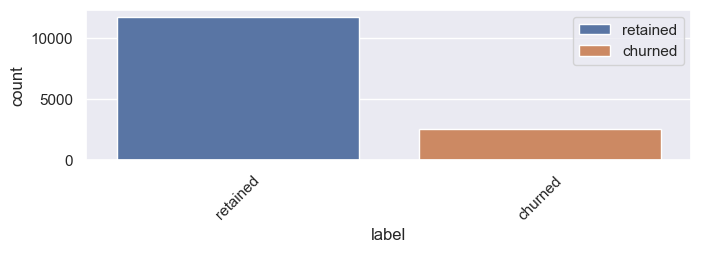

iPhone     0.64515
Android    0.35485
Name: device, dtype: float64
iPhone     9225
Android    5074
Name: device, dtype: int64


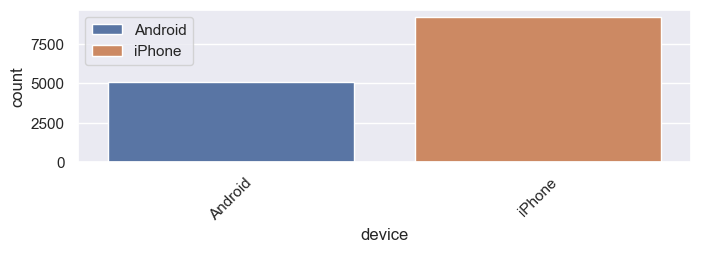

In [8]:
## Observing the counts per categoty
for cat in binary:
    print(df[cat].value_counts(normalize=True))
    print(df[cat].value_counts())
    plt.figure(figsize = (8.48,4)) #18, 8
    ax = sns.countplot(x=df[cat], label=df[cat].unique());
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout(pad=5.0)
    plt.show()

#### Bringing string into binary

In [9]:
df['label']  = df['label'].map({'retained': 0 ,'churned': 1 })
df['device'] = df['device'].map({'Android': 0 ,'iPhone': 1 })

#### Observing continious variables distribution
Also transforming to `np.log1p` that does not return inf when calculating the log of zero.

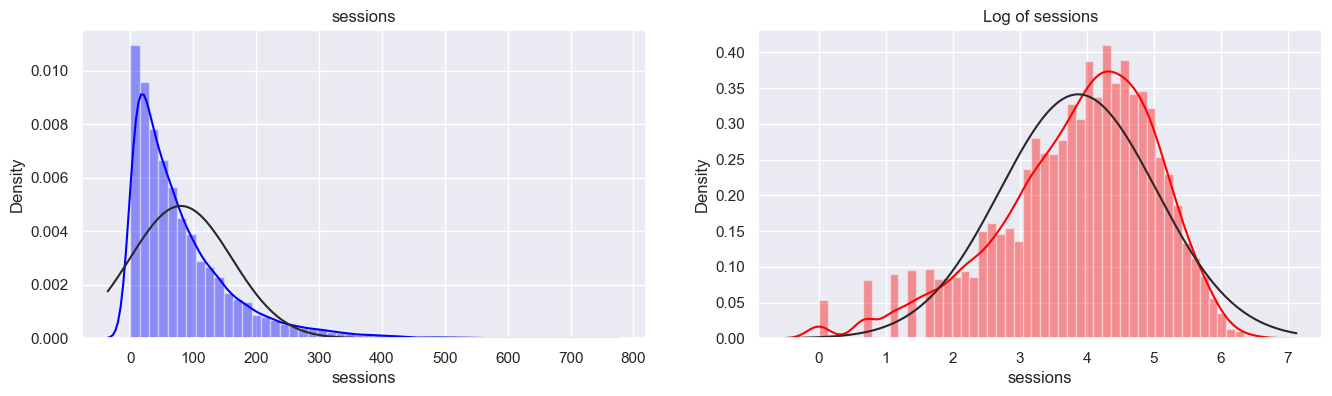

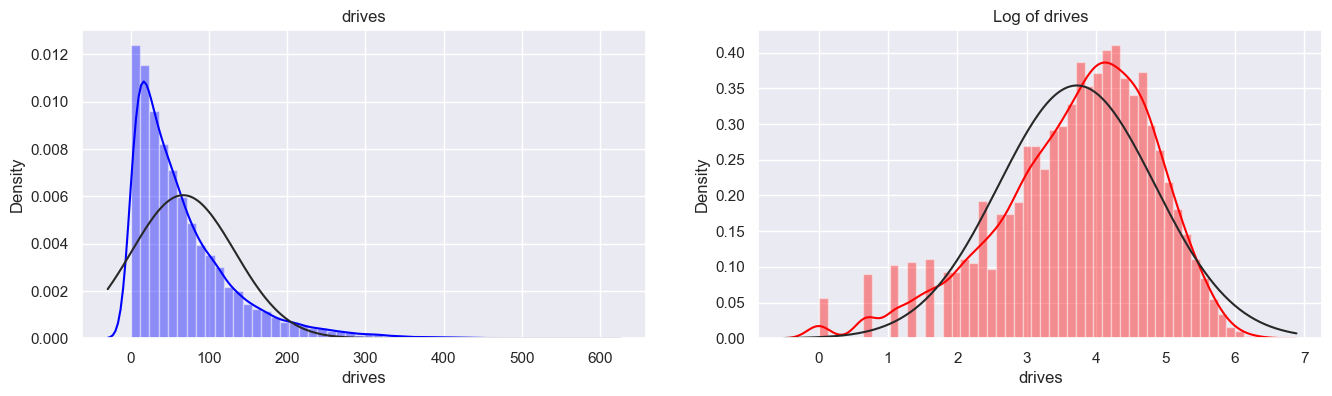

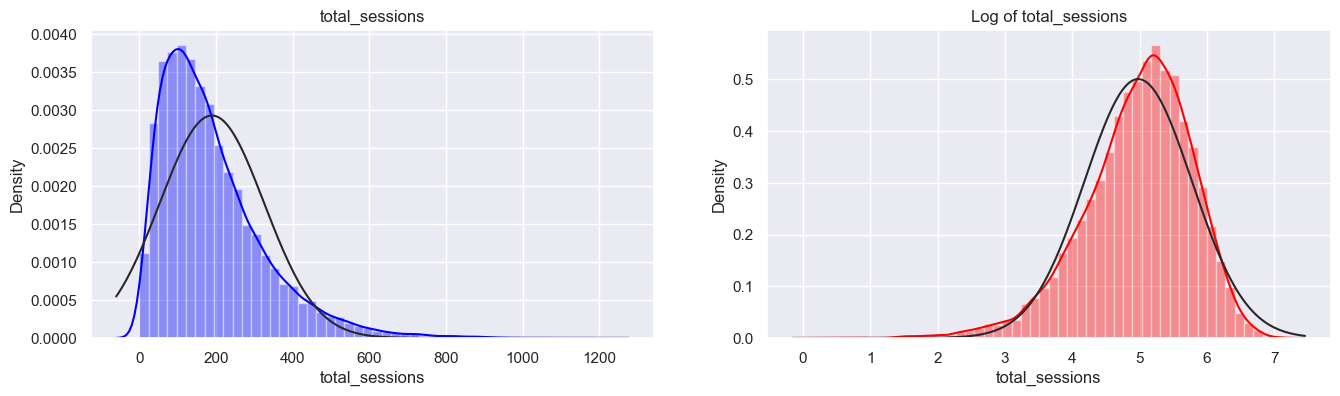

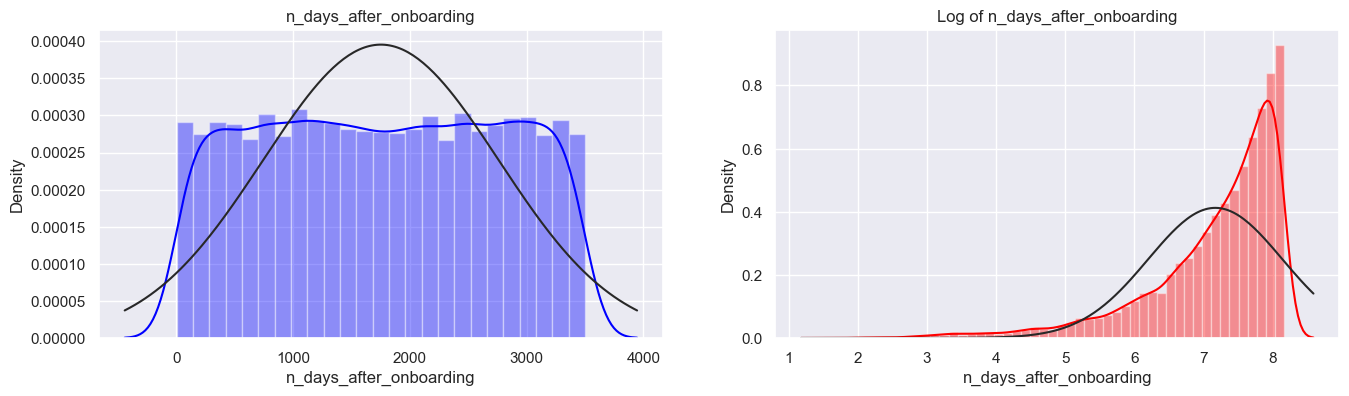

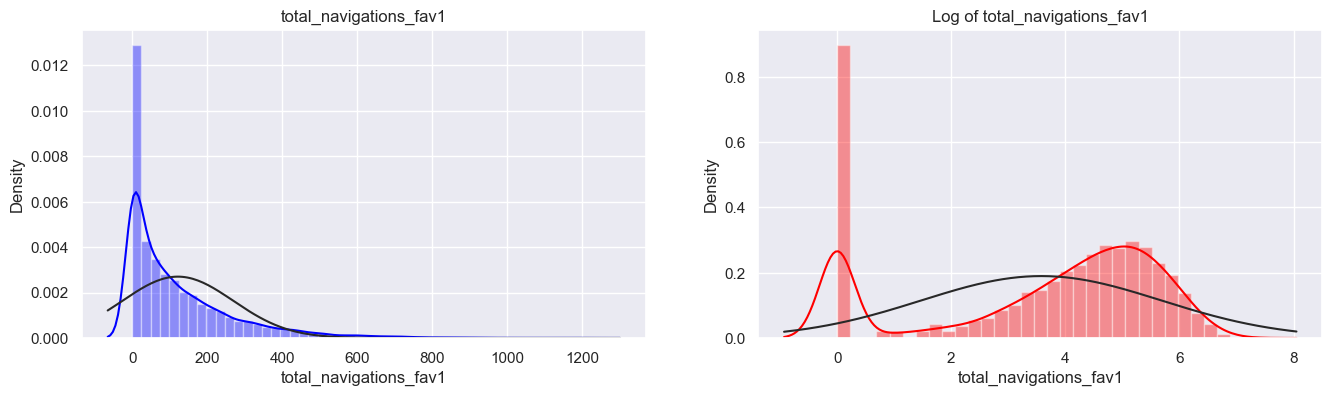

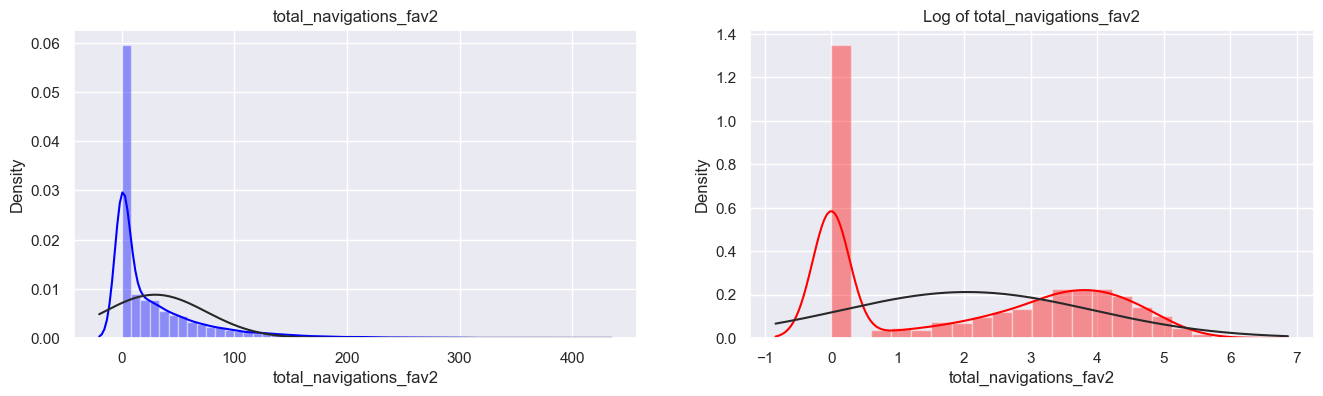

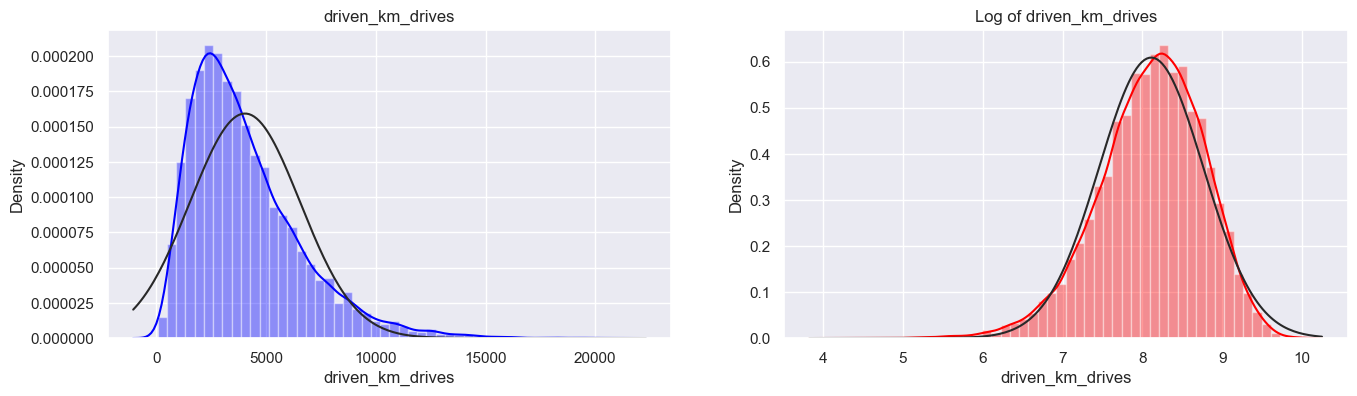

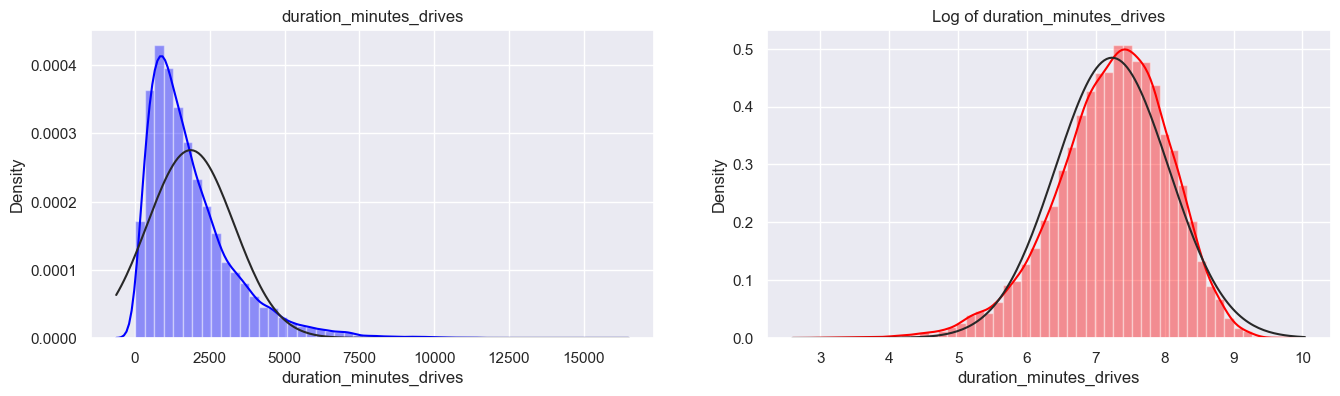

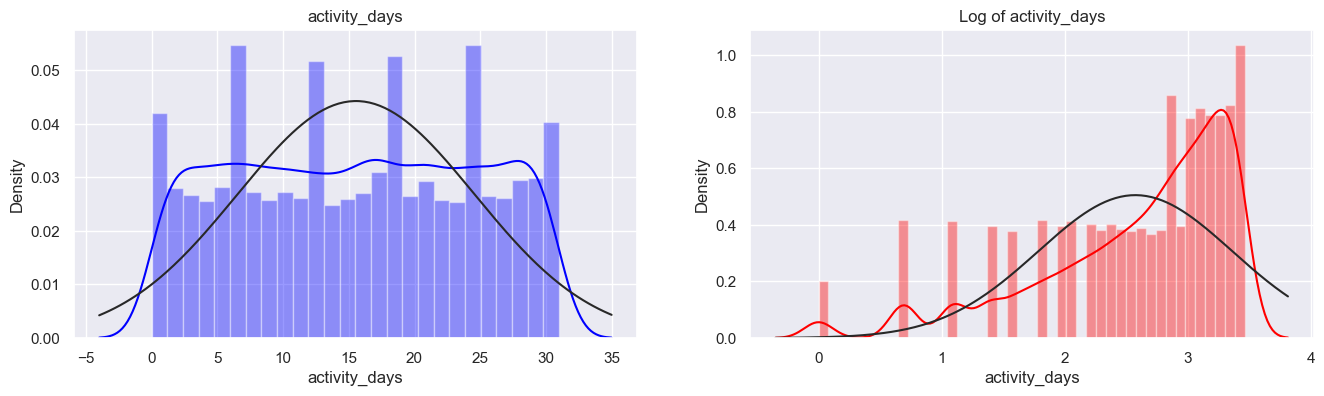

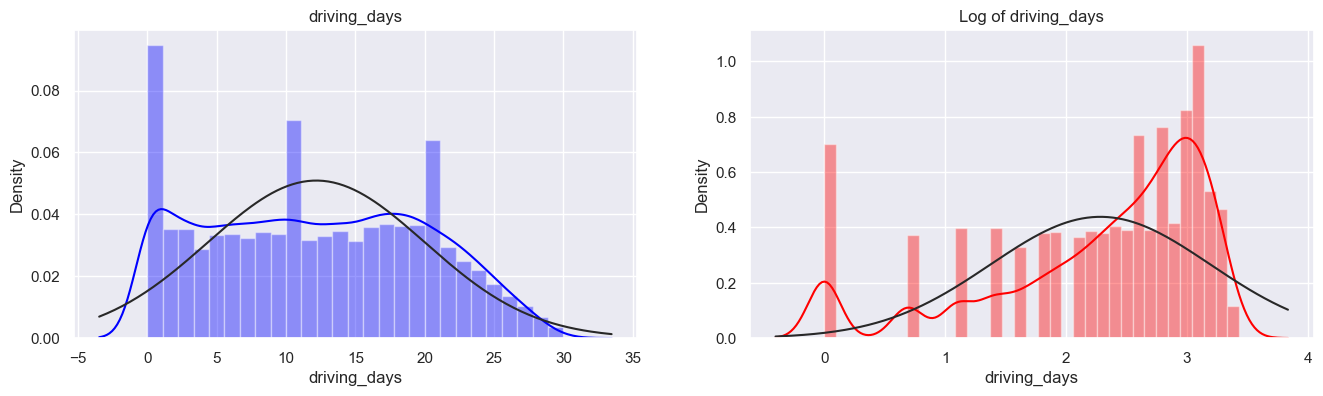

In [10]:
## Comparnig current distribution to its log.
## This np.1plog is not a regular log and does not return inf when looking for the log of 0.
for i in continious:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(df[i], kde=True, fit=scipy.stats.norm , color='Blue') 
    plt.title(i)
    plt.subplot(1, 2, 2)
    sns.distplot(np.log1p(df[i]), kde=True, fit=scipy.stats.norm, color='Red') ## fits is deprecated, still good to demo.
    plt.title('Log of '+i);

#### Distributions are not that normal, and some transformations do look normal, we still have to confirm.

Looking as well into the box plot. 

#### Outliers:

In deterministic models, the presence of outliers can be problematic. 


It's good practice to get a sense of just how many of your data points could be considered outliers. 

The definition of an outlier can change based on the details of the project, and it helps to have domain expertise to decide a threshold. A common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

The values for the count variables are not normally distributed. They are skewed to the right. 

One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"


In [11]:
def distribution(df, col):
    
    """
    Recieve a dataframe and a column.
    Return a data frame with information related
    to the empirical rule compared to a column
    distribution, an hisogram and a qq plot.
    
    Args:
        df(pd.DataFrame): a pandas DataFrame
        column: a pandas series
    """

    
    mean = round(df[col].mean(), 3)
    median=round(df[col].median(), 3)
    SD   = df[col].std()
    
    lowerLim = mean - 1 * SD
    upperLim = mean + 1 * SD

    pct1 = round(((df[col] >= lowerLim) & (df[col] <= upperLim)).mean(), 2)

    ## 2SD from the mean

    lowerLim2 = mean - 2 * SD
    upperLim2 = mean + 2 * SD

    pct2 = round(((df[col] >= lowerLim2) & (df[col] <= upperLim2)).mean(), 2)

    ## 3SD from the mean
    
    lowerLim3 = mean - 3 * SD
    upperLim3 = mean + 3 * SD

    pct3 = round(((df[col] >= lowerLim3) & (df[col] <= upperLim3)).mean(), 2)
    11.7,8.27
    plt.figure(figsize=( 12.7,6.27))
    ax = plt.subplot()
    p = sns.histplot(data=df[col], kde=col, hue=None, legend=False)
    plt.legend(title='Values within 1, 2, 3 SD from the mean', loc='upper left',\
               labels=[pct1, pct2, pct3])
    ax.set_title(col)
    ax.text(0.65, 0.65, f'median={median}', color='g',
            ha='left', va='top', transform=ax.transAxes)
    ax.text(0.65, 0.85, f'mean={mean}', color='m',
            ha='left', va='top', transform=ax.transAxes)
    
    ax.axvline(x=median, color='g', linestyle='--')
    ax.axvline(x=mean, color='m', linestyle='--')
    
    ax.axvline(x=lowerLim, color='r', linestyle='dotted')
    ax.axvline(x=upperLim, color='r', linestyle='dotted')
    
    ax.axvline(x=lowerLim2, color='b', linestyle='dashed')
    ax.axvline(x=upperLim2, color='b',linestyle='dashed')
    
    ax.axvline(x=lowerLim3, color='y', linestyle='dashdot')
    ax.axvline(x=upperLim3, color='y', linestyle='dashdot')
    ## qqplot from stats
    sm.qqplot(df[col], fit=True, line='45')
    
    plt.show()
    

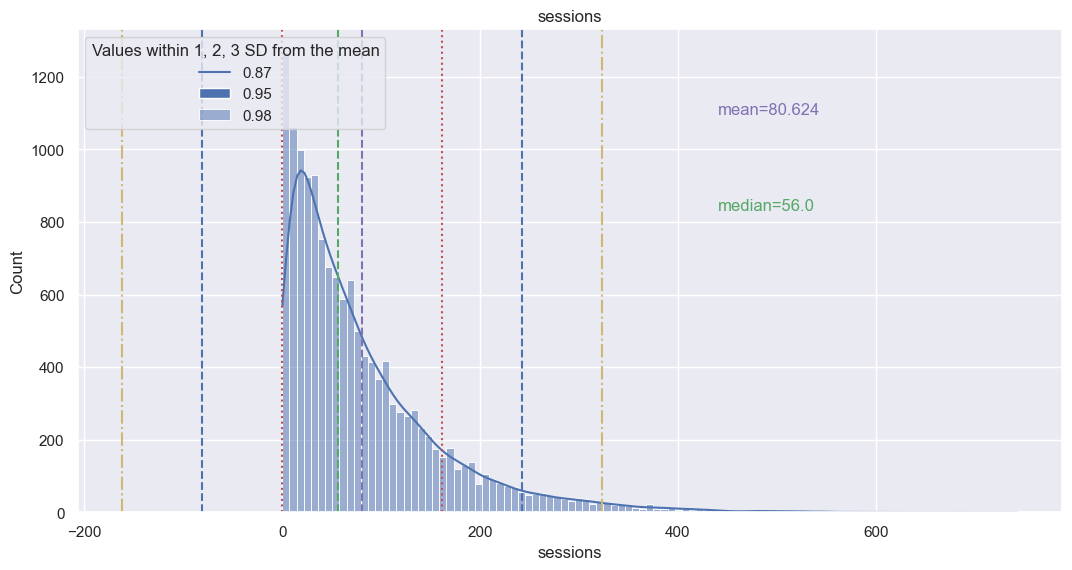

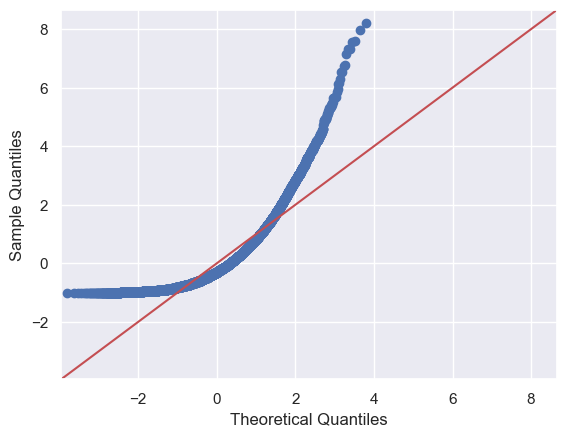

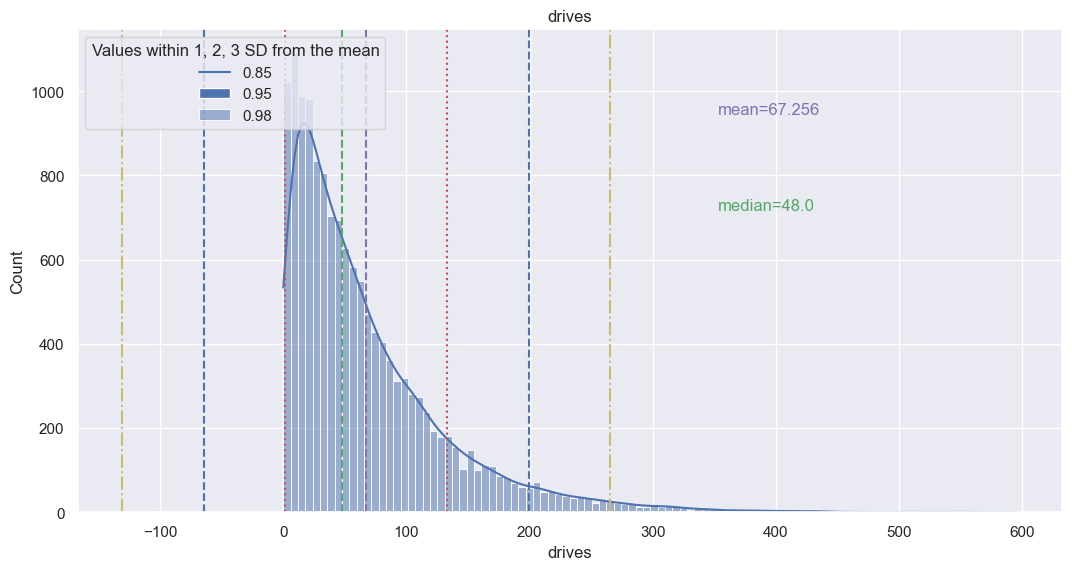

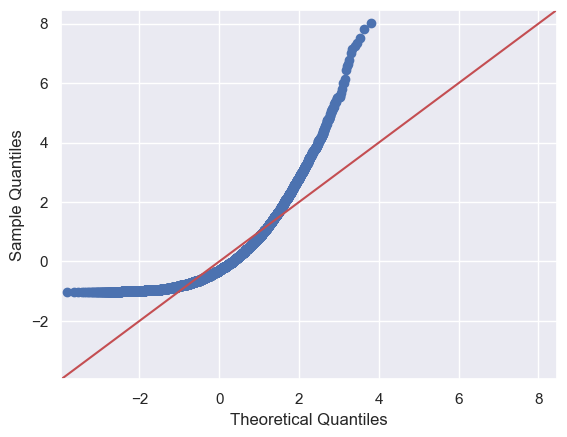

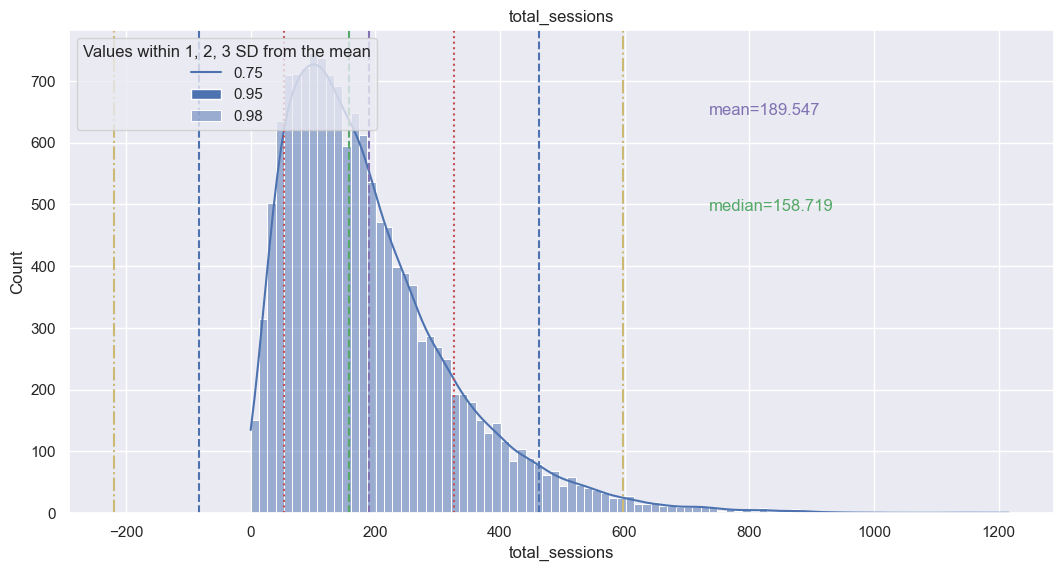

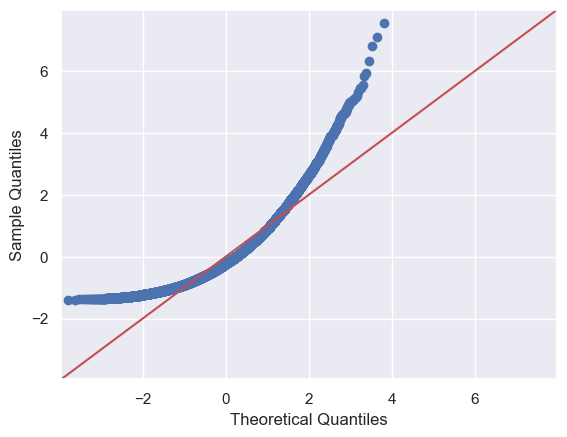

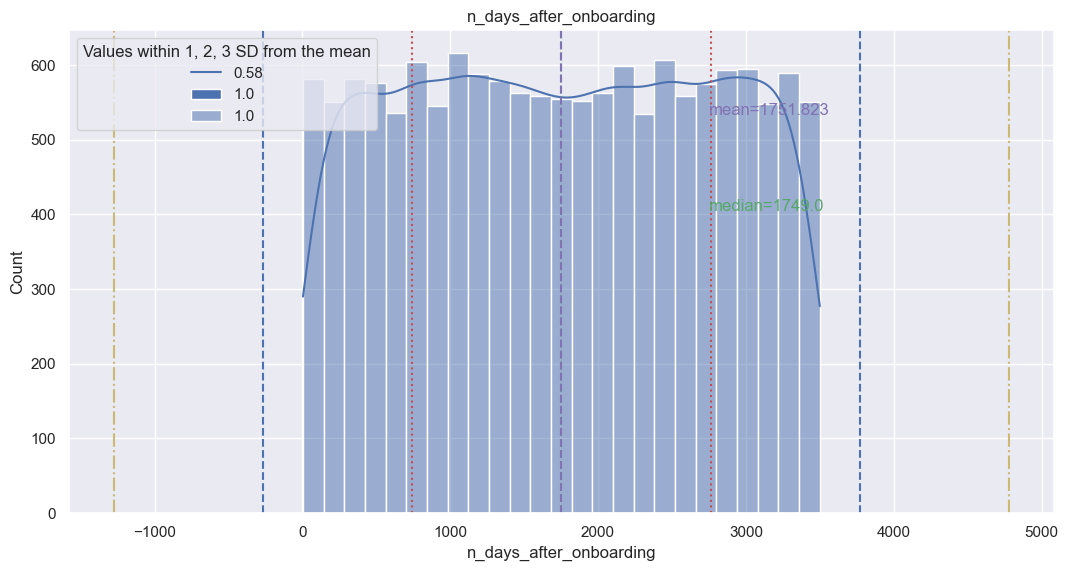

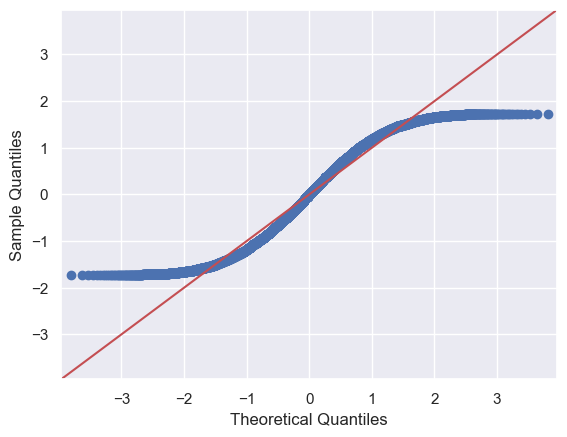

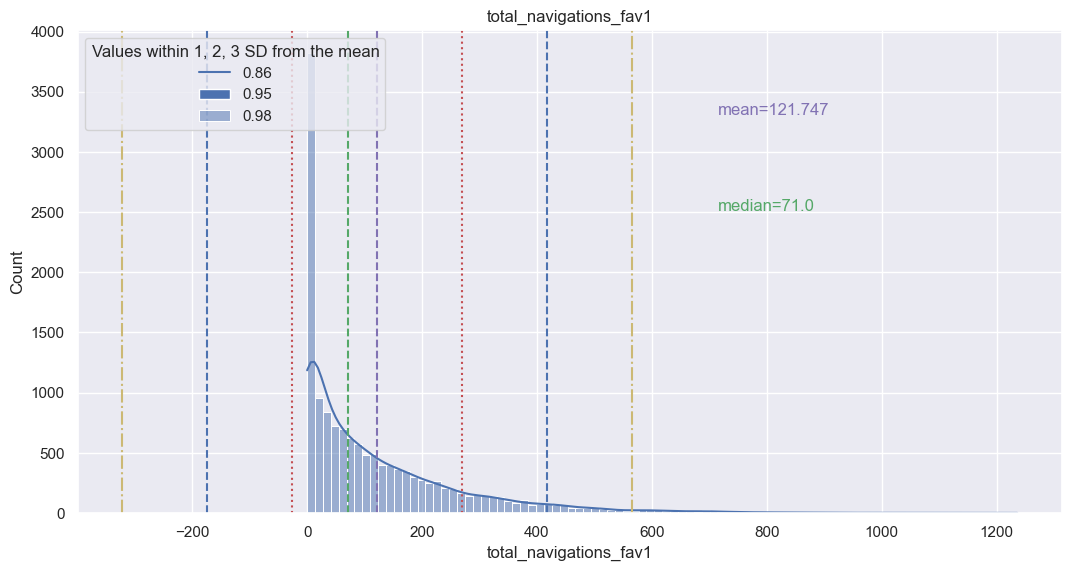

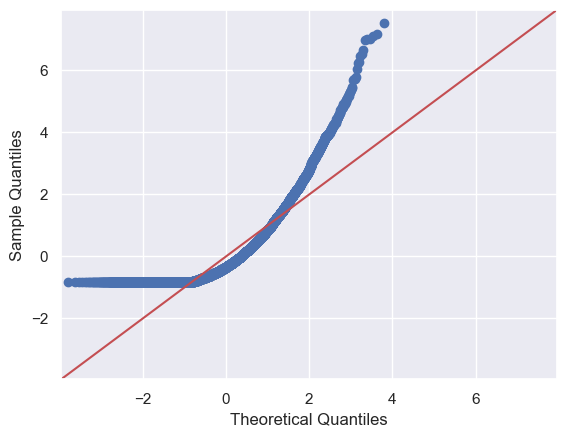

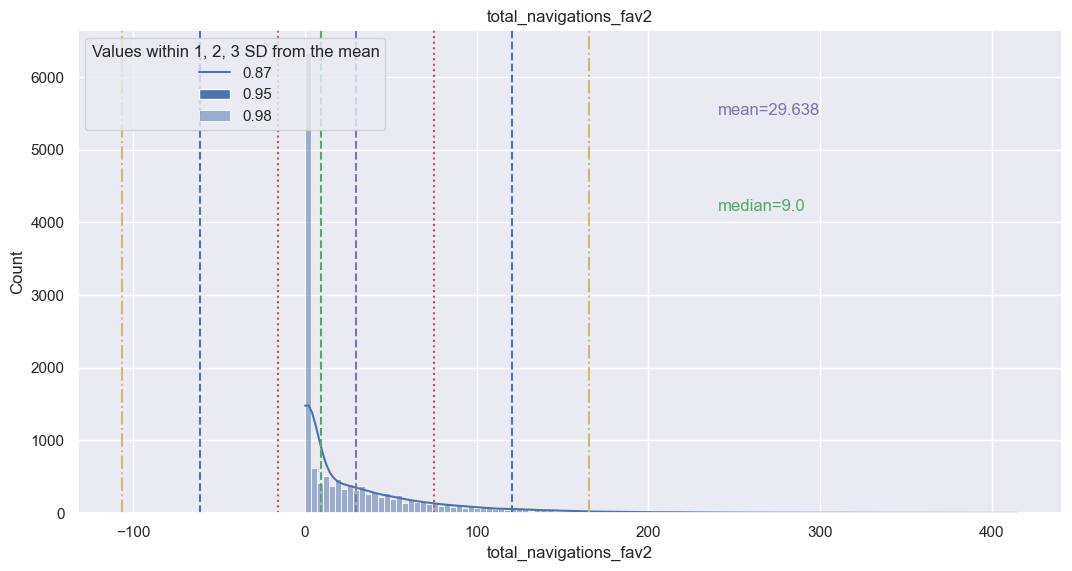

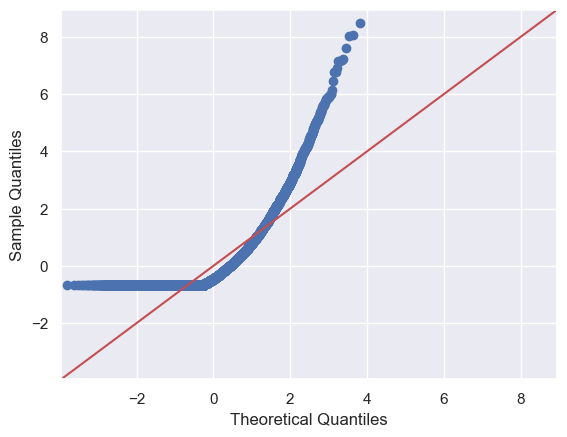

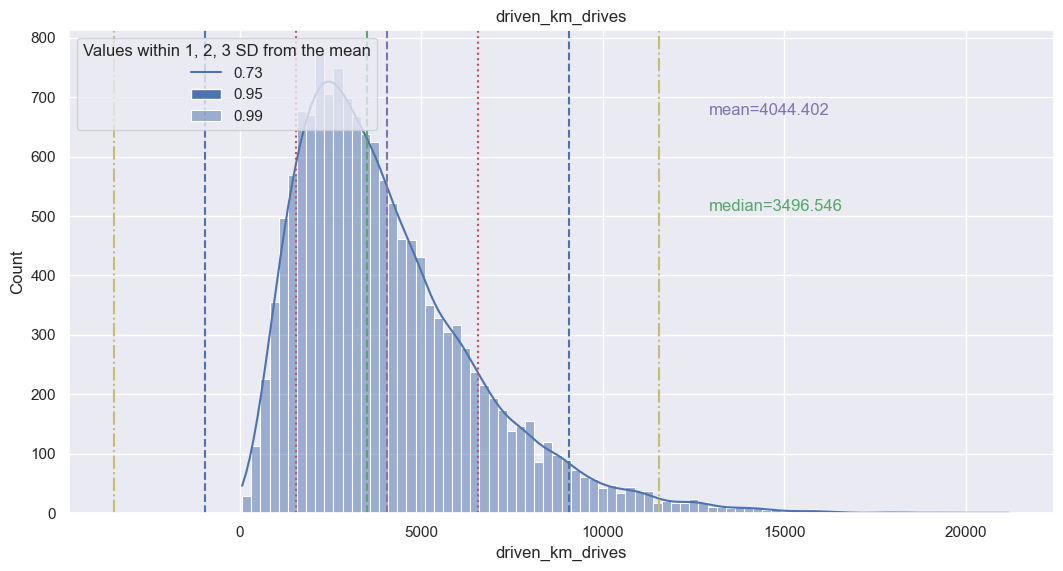

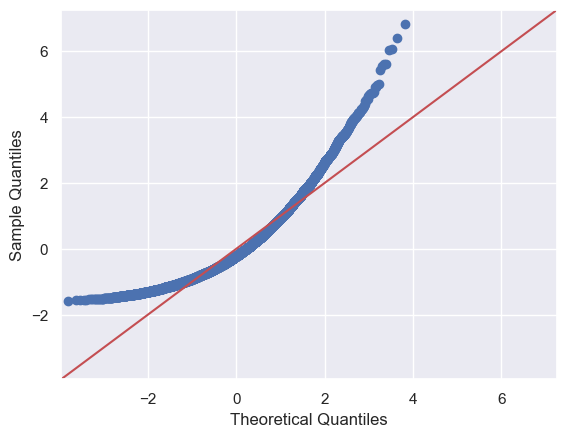

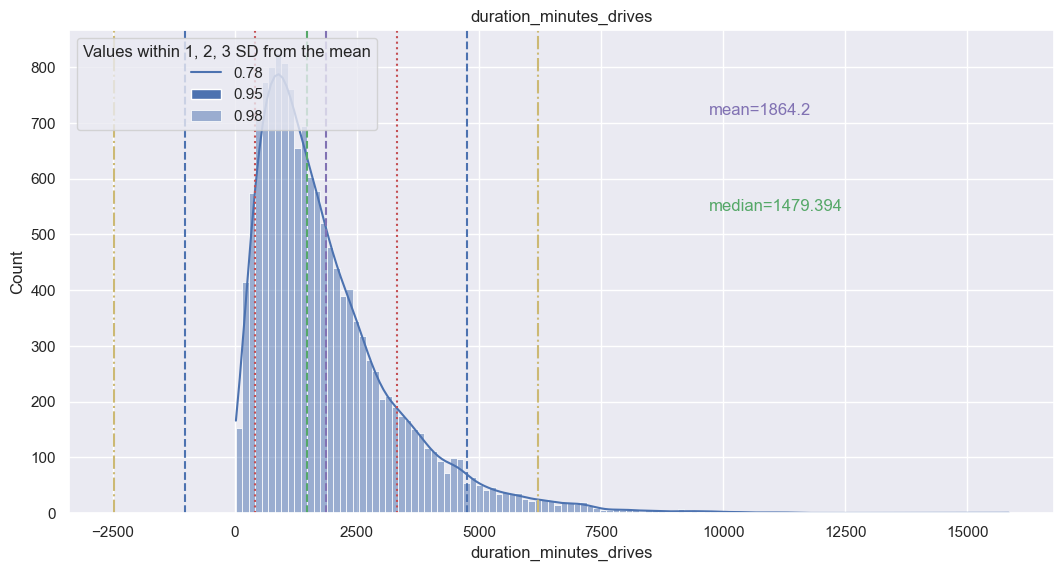

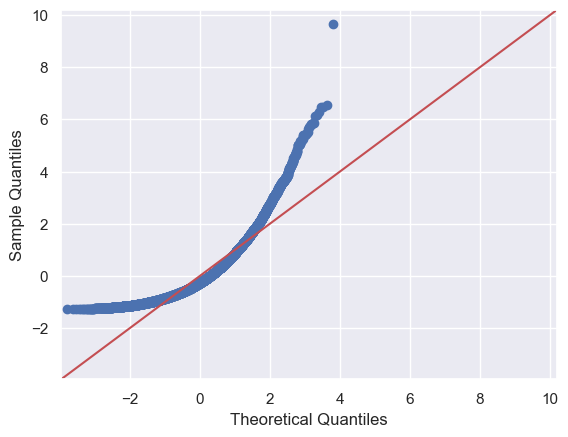

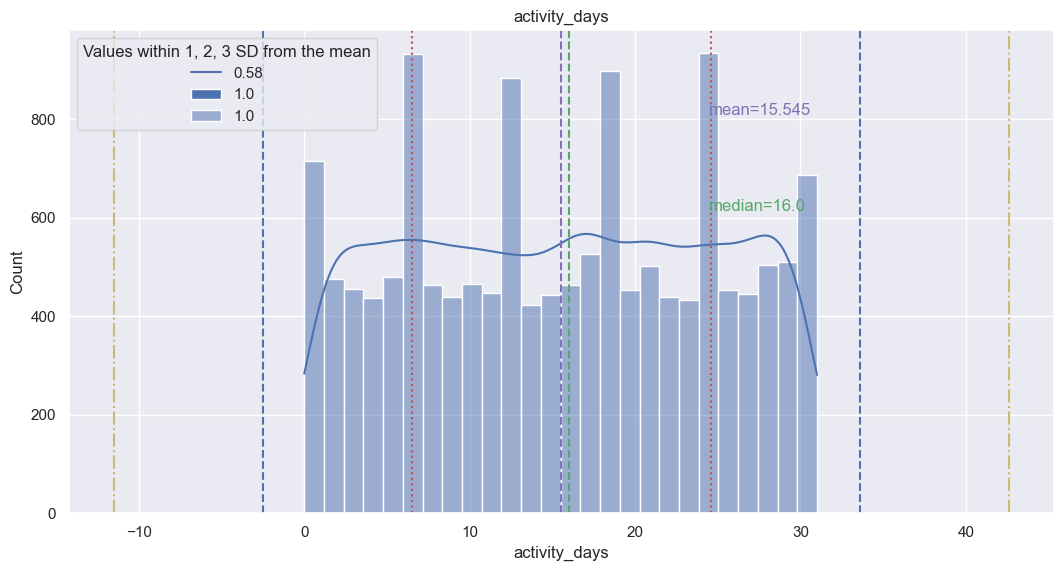

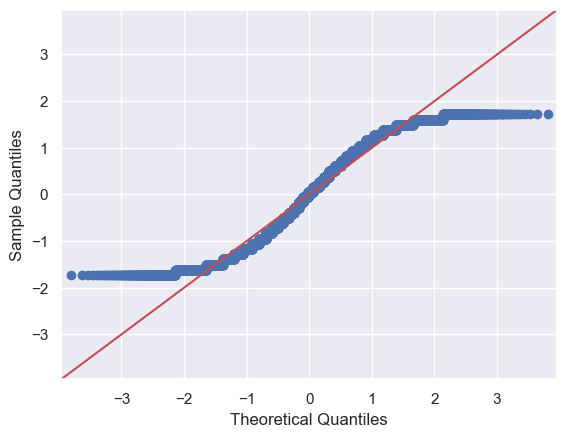

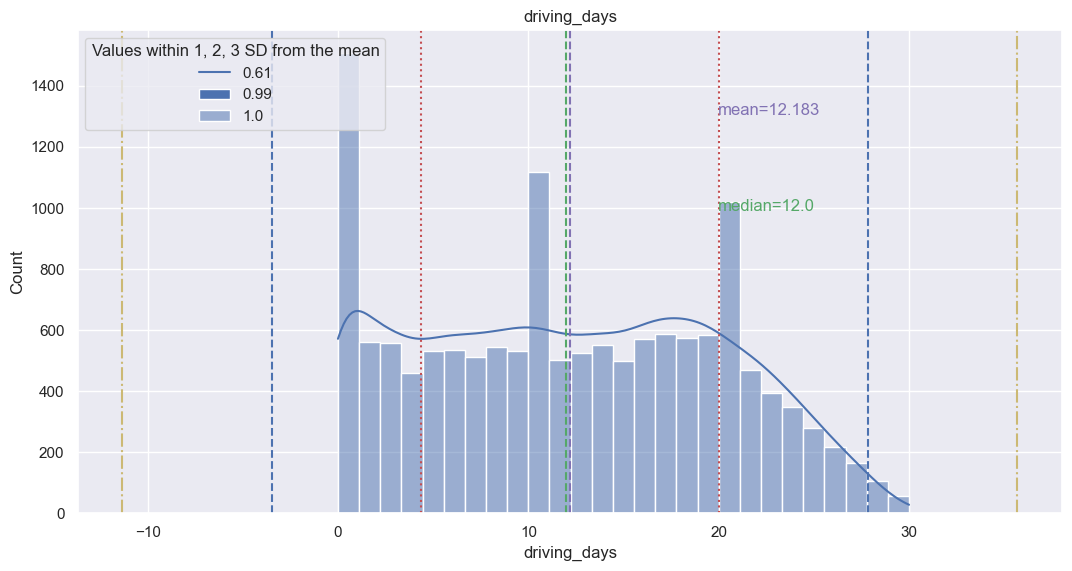

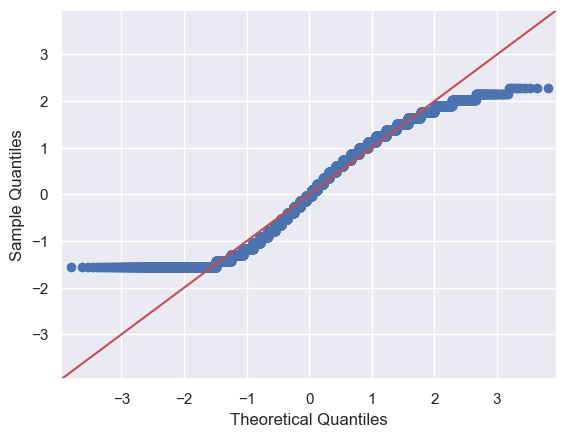

In [12]:
for i in continious:
    distribution(df, i)

Number of outliers, sessions: 1364
Number of outliers, drives: 1319
Number of outliers, total_sessions: 1098
Number of outliers, n_days_after_onboarding: 0
Number of outliers, total_navigations_fav1: 1393
Number of outliers, total_navigations_fav2: 1913
Number of outliers, driven_km_drives: 1028
Number of outliers, duration_minutes_drives: 1260
Number of outliers, activity_days: 0
Number of outliers, driving_days: 0


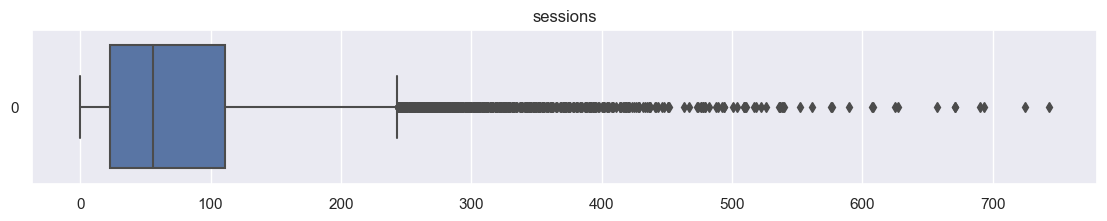

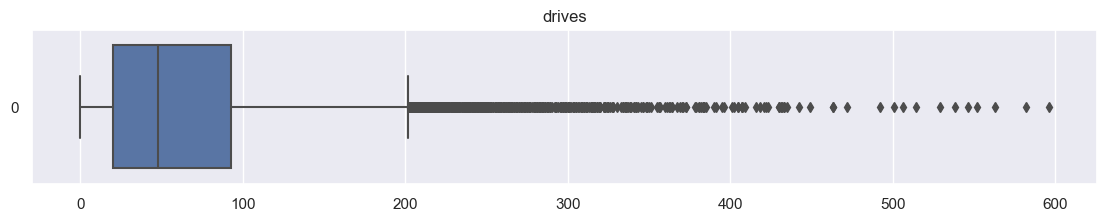

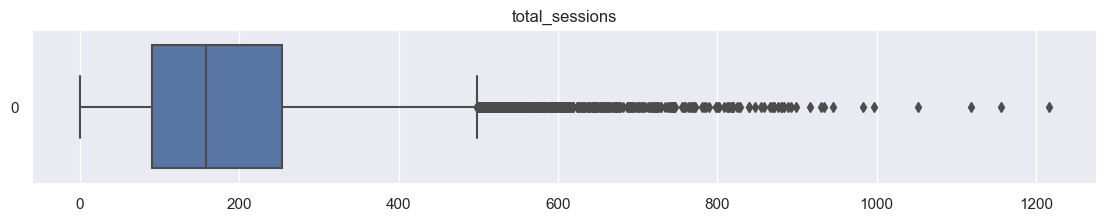

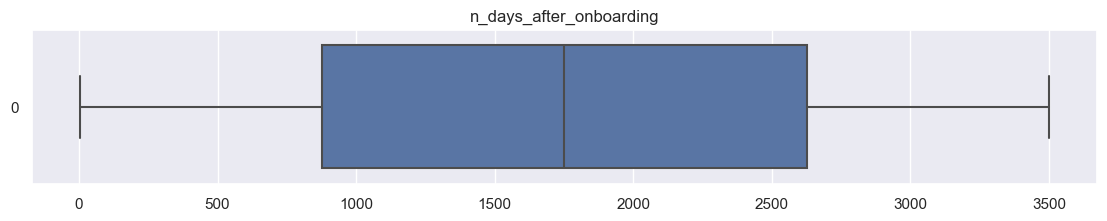

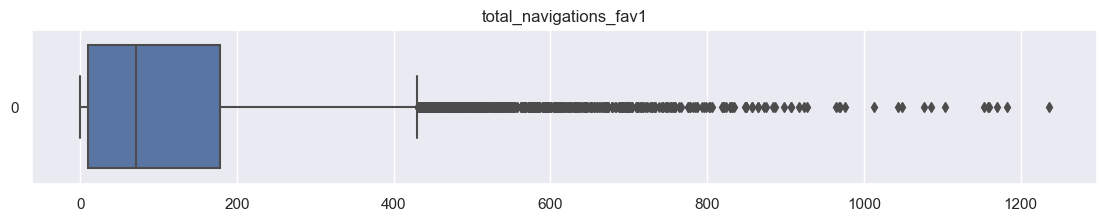

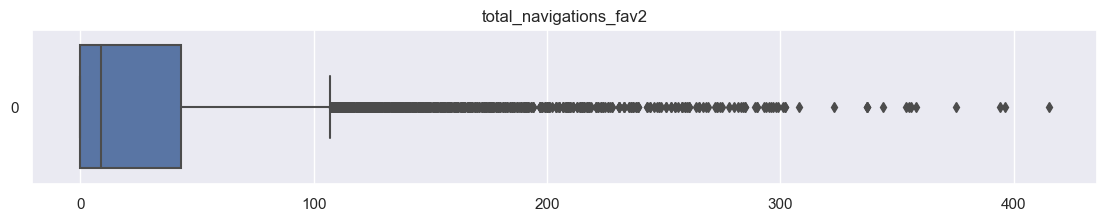

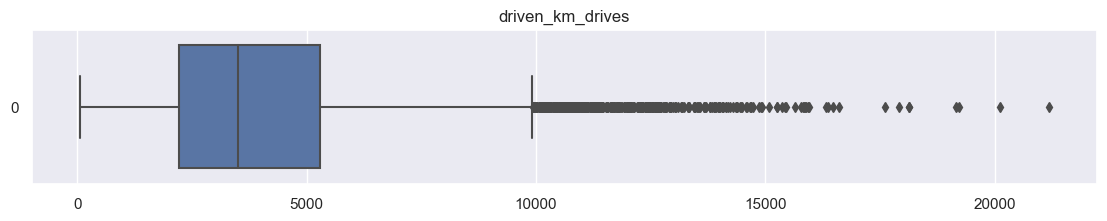

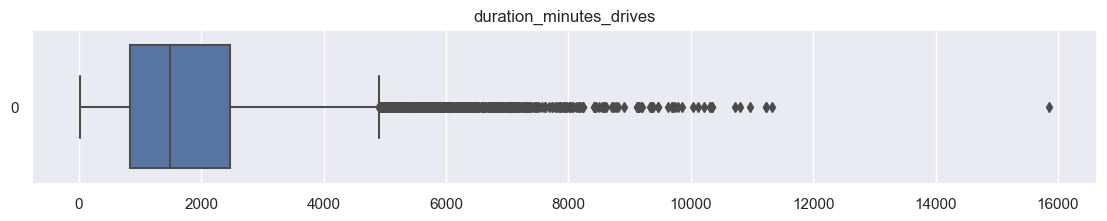

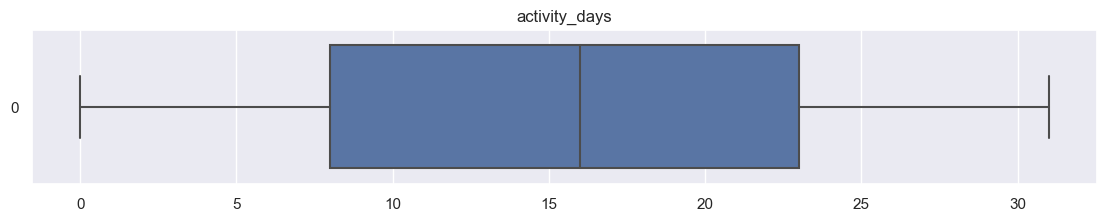

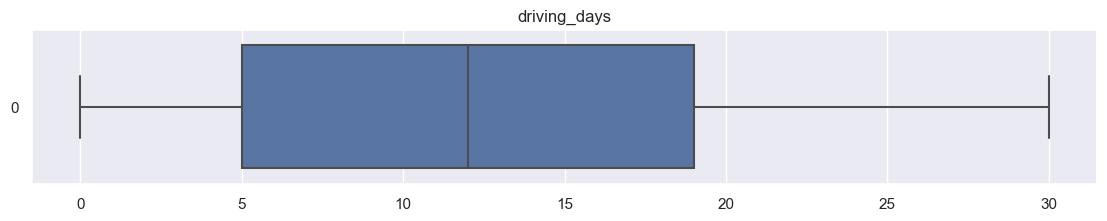

In [13]:
## Observing continious variables with outliers
## Box plots and number of outliers
for column in continious:
    plt.figure(figsize = (13.75, 2))
    sns.boxplot(data=df[column], orient='h');
    plt.title(column)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

#### Lets look how is the retantion by the type of device

In [14]:
df.groupby(['label', 'device']).size()


label  device
0      0         4183
       1         7580
1      0          891
       1         1645
dtype: int64

Device 0 is Android
Churned is 1


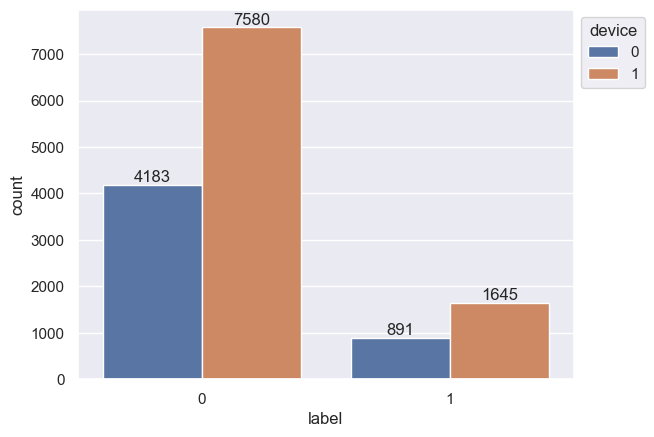

In [15]:
p = sns.countplot(data=df, x='label', hue='device')
p.legend(title='device', bbox_to_anchor=(1, 1), loc='upper left')
print('Device 0 is Android')
print('Churned is 1')
for c in p.containers:
    ## set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')


#### `driving_days` vs. `activity_days`

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `user_days`.

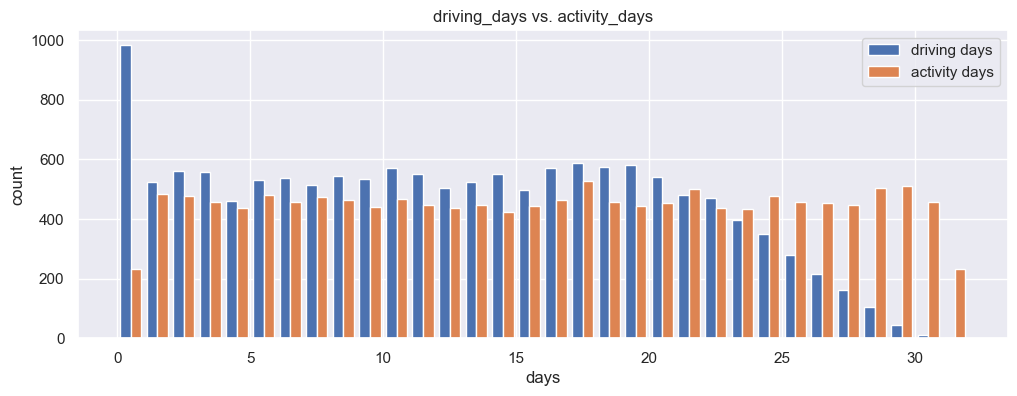

In [16]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [17]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

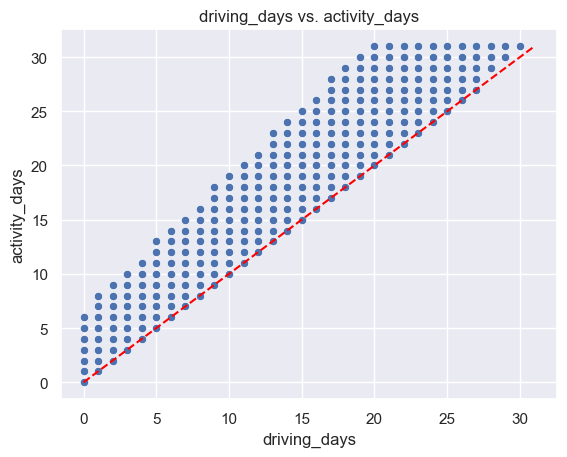

In [18]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### Handling outliers

The function outlier_imputer() takes two arguments: column_name and percentile. The percentile argument is the percentile that will be used to define the threshold for outliers.

The function first calculates the threshold by calling the quantile() method on the df DataFrame and passing in the percentile argument. 

The quantile() method returns the value at the specified percentile. In this case, the threshold will be the value that is greater than or equal to percentile percent of the values in the column.

The function uses the loc method to **replace all the values in the column that are greater than the threshold with the threshold value.**

Finally, the function prints the column name, percentile, and threshold to the console, to confirm.

#### **Retention by kilometers driven per driving day**

We discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn.


In [19]:
## Creating `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [20]:
## 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

## 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [30]:
## 15420 km per day!!!!
## 
15420 / 24
## 642.5 km per hour!!
## 

642.5

The maximum value is 15420 kilometers _per drive day_. This is pretty hard to do. Driving 642 km/hour for 24 hours is 15420 km. 

It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 
880 km. ( thal leaves you one hour to sleep and 23 hrs driving...)

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater or equal than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

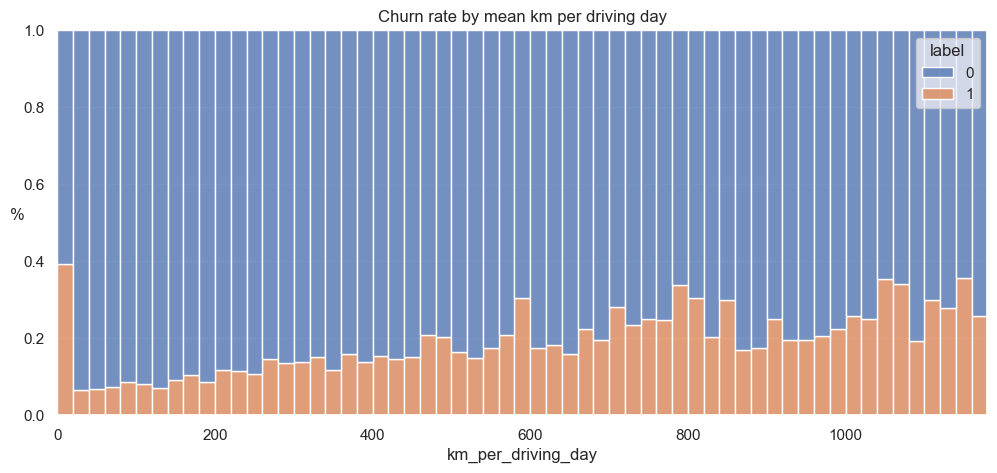

In [31]:
## Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1200,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### Churn rate per number of driving days

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

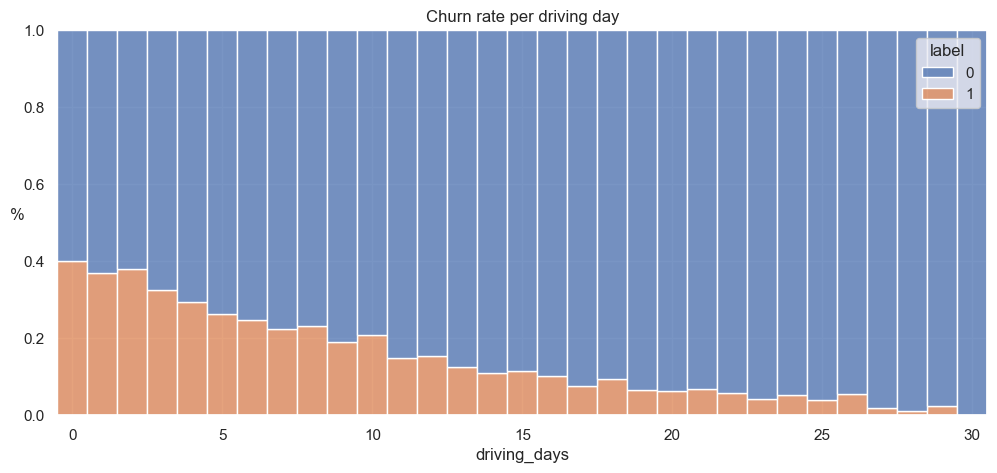

In [32]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### Proportion of sessions that occurred in the last month

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [23]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].median()

0.4243102549137284

Median: 0.4


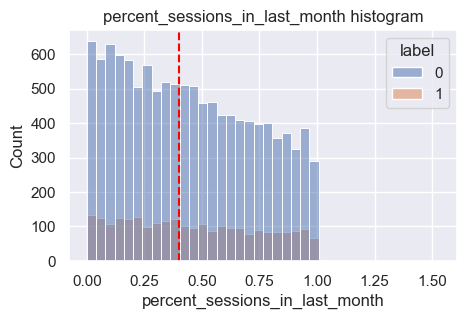

In [33]:
# Histogram

# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

In [34]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [35]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 200.0
           total_sessions | percentile: 0.95 | threshold: 455.428323849
         driven_km_drives | percentile: 0.95 | threshold: 8898.6773365
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.116791379999


In [36]:

df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.

Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

Confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?

Less than 18% of users churned, and \~82% were retained.

Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.